
📌 Best tour found: [3, 1, 2, 0, 4, 3]
🛣️ Total distance: 166.99575553275338


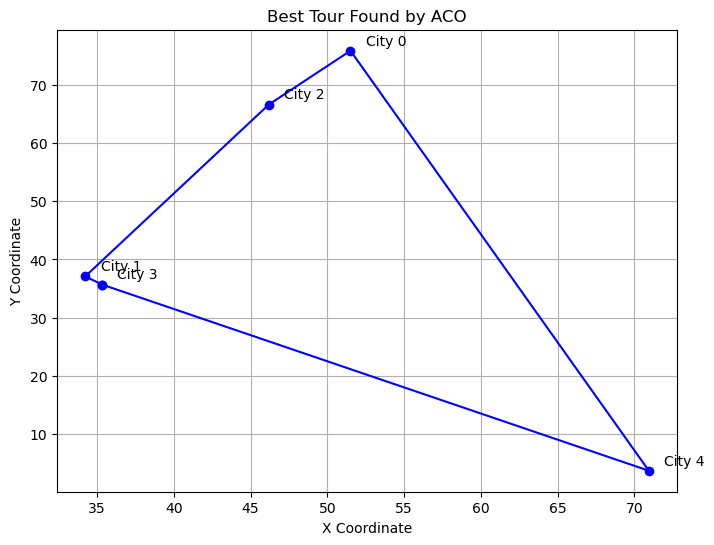

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ---------- Configuration ----------
num_cities = 5
num_ants = 10
num_iterations = 100
alpha = 1
beta = 5
evaporation_rate = 0.5
Q = 100

# ---------- Coordinates of Cities (for plotting) ----------
city_coords = np.random.rand(num_cities, 2) * 100  # Random (x, y) for each city

# ---------- Distance Matrix ----------
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distances[i][j] = np.linalg.norm(city_coords[i] - city_coords[j])

# ---------- Initialize Pheromone ----------
pheromone = np.ones((num_cities, num_cities))

# ---------- Choose Next City ----------
def choose_next_city(current_city, visited, pheromone, distances):
    probs = []
    for j in range(num_cities):
        if j not in visited:
            tau = pheromone[current_city][j] ** alpha
            eta = (1 / distances[current_city][j]) ** beta
            probs.append((j, tau * eta))
    if not probs:
        return None
    total = sum(p[1] for p in probs)
    probs = [(city, prob / total) for city, prob in probs]
    r = random.random()
    cumulative = 0
    for city, prob in probs:
        cumulative += prob
        if r <= cumulative:
            return city
    return probs[-1][0]

# ---------- Build a Tour ----------
def build_tour(pheromone, distances):
    tour = [random.randint(0, num_cities - 1)]
    while len(tour) < num_cities:
        next_city = choose_next_city(tour[-1], tour, pheromone, distances)
        tour.append(next_city)
    tour.append(tour[0])
    return tour

# ---------- Calculate Tour Length ----------
def tour_length(tour, distances):
    return sum(distances[tour[i]][tour[i+1]] for i in range(len(tour) - 1))

# ---------- Main ACO Loop ----------
best_tour = None
best_length = float('inf')

for iteration in range(num_iterations):
    all_tours = []
    for ant in range(num_ants):
        tour = build_tour(pheromone, distances)
        length = tour_length(tour, distances)
        all_tours.append((tour, length))
        if length < best_length:
            best_length = length
            best_tour = tour

    # Evaporate pheromone
    pheromone *= (1 - evaporation_rate)

    # Add pheromone
    for tour, length in all_tours:
        for i in range(len(tour) - 1):
            a = tour[i]
            b = tour[i + 1]
            pheromone[a][b] += Q / length
            pheromone[b][a] += Q / length

# ---------- Print Result ----------
print("\n📌 Best tour found:", best_tour)
print("🛣️ Total distance:", best_length)

# ---------- Plot the Tour ----------
x = [city_coords[city][0] for city in best_tour]
y = [city_coords[city][1] for city in best_tour]

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
for i, (x_coord, y_coord) in enumerate(city_coords):
    plt.text(x_coord + 1, y_coord + 1, f'City {i}', fontsize=10)
plt.title('Best Tour Found by ACO')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


In [ ]:
Absolutely! Let’s break it down in a clear, well-structured way so you can easily explain it to an external examiner or include it in your report or viva prep. 🧠✨

---

## ✅ **AIM:**

To implement the **Ant Colony Optimization (ACO)** algorithm to solve the **Traveling Salesman Problem (TSP)** using Python.

---

## 📘 **THEORY:**

### 🔬 What is Ant Colony Optimization?

**Ant Colony Optimization (ACO)** is a **bio-inspired** metaheuristic algorithm that mimics the **foraging behavior of real ants**. When searching for food, ants leave behind **pheromone trails**. Other ants tend to follow stronger trails, leading to the emergence of the shortest path from nest to food.

This simple behavior is **simulated in computers** to solve **optimization problems**, especially combinatorial problems like TSP.

---

### 🔍 How ACO Works for TSP:

| Step | Description                                                                                                                          |
| ---- | ------------------------------------------------------------------------------------------------------------------------------------ |
| 1️⃣  | **Initialization:** All paths start with equal pheromone levels.                                                                     |
| 2️⃣  | **Tour Construction:** Each ant builds a tour based on **pheromone intensity (desirability)** and **distance (visibility)**.         |
| 3️⃣  | **Evaluation:** The tour length (total distance) is calculated.                                                                      |
| 4️⃣  | **Pheromone Update:** Ants deposit pheromones on the paths they took. Shorter tours leave more pheromones.                           |
| 5️⃣  | **Evaporation:** Some pheromone is evaporated to avoid too much bias.                                                                |
| 6️⃣  | **Best Path Selection:** Over iterations, paths with more pheromones attract more ants, leading to convergence on the shortest path. |

---

## 🛠️ **APPLICATIONS of ACO:**

1. **Traveling Salesman Problem (TSP)**
2. **Vehicle Routing Problems (VRP)**
3. **Job Scheduling in Manufacturing**
4. **Routing in Communication Networks**
5. **Data Mining – Feature Selection**
6. **Dynamic Path Planning for Robots**
7. **Cloud Resource Allocation**
8. **Supply Chain Optimization**

Basically, **any problem that involves finding an optimal path or sequence** can use ACO!

---

## 👍 **ADVANTAGES of ACO:**

| 🌟 Point                          | Explanation                                                             |
| --------------------------------- | ----------------------------------------------------------------------- |
| ✅ Nature-Inspired                 | Mimics real-world biological intelligence (swarm behavior)              |
| ✅ Good for Combinatorial Problems | Very effective for NP-hard problems like TSP                            |
| ✅ Distributed Computation         | Ants work in parallel, so it’s scalable                                 |
| ✅ Adaptability                    | Adjusts dynamically as problem changes (great for dynamic systems)      |
| ✅ Avoids Local Minima             | Randomized behavior + pheromone evaporation helps escape poor solutions |

---

## 👎 **DISADVANTAGES of ACO:**

| ⚠️ Point                        | Explanation                                                     |
| ------------------------------- | --------------------------------------------------------------- |
| ❌ Slower Convergence            | Compared to other heuristics like Greedy or Simulated Annealing |
| ❌ Sensitive to Parameters       | Needs careful tuning of alpha, beta, evaporation rate, etc.     |
| ❌ Risk of Premature Convergence | Too strong pheromone trails may lead to sub-optimal paths early |
| ❌ High Computation              | Especially for large-scale problems, it can be compute-heavy    |

---

## 🧠 TL;DR Summary:

> Ant Colony Optimization is a **nature-inspired algorithm** that solves **path optimization problems** using **artificial ants** that learn the best route based on **pheromone trails** and **distance**. It’s **great for dynamic and complex search spaces**, though a bit slower and sensitive to parameters.

**************************************TSP***********************************

Great question! Let's break it down simply and clearly. 😎

---

## 🧭 What is the **Traveling Salesman Problem (TSP)?**

### 📌 **Definition:**

The **Traveling Salesman Problem** is a classic **combinatorial optimization problem**.

> A salesman needs to **visit a list of cities exactly once**, and then return to the **starting city**. The goal is to find the **shortest possible route** that covers all cities and returns to the beginning.

---

### 💡 **Real-Life Example:**

Imagine you're delivering packages across 10 cities. You want to:

* Visit **each city once** (no repeats).
* **Minimize the total travel distance or time**.
* Come back to your **starting point**.

That’s a TSP!

---

### 🔍 **Formally:**

* You are given a list of `n` cities and the distance between each pair.
* The task is to find the **shortest closed tour** (a cycle) that visits every city once.

---

### 🔗 **Why is it hard?**

Because as the number of cities increases, the number of possible routes grows **exponentially**:

* For 4 cities → 6 possible routes
* For 10 cities → 362,880 routes
* For 20+ cities → Billions!

Brute-force checking all routes becomes **impractical**, so we use smart algorithms like **Ant Colony Optimization** to solve it efficiently.

---

### 🧠 **Why is TSP important?**

**Applications include:**

* Logistics and delivery route planning 🛻
* Manufacturing (circuit board design) 🧩
* Network routing 🌐
* Drone path optimization 🚁
* Travel itinerary planning ✈️




In [ ]:
### 🧠 **IMPORTS**

```python
import numpy as np
import random
import matplotlib.pyplot as plt
```

* `numpy` is for math operations and matrices.
* `random` is for picking cities and probabilities.
* `matplotlib.pyplot` is for plotting the final best tour.

---

### ⚙️ **CONFIGURATION**

```python
num_cities = 5
num_ants = 10
num_iterations = 100
alpha = 1                # Pheromone importance
beta = 5                 # Distance importance
evaporation_rate = 0.5   # Pheromone evaporation rate
Q = 100                  # Constant for pheromone deposit
```

These are algorithm hyperparameters. `alpha` and `beta` control the influence of pheromone vs distance. `Q` is used for pheromone strength.

---

### 🏙️ **CITY COORDINATES (for visual plotting)**

```python
city_coords = np.random.rand(num_cities, 2) * 100
```

Generates random `(x, y)` coordinates for each city, scaled between 0 and 100.

---

### 📏 **DISTANCE MATRIX**

```python
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distances[i][j] = np.linalg.norm(city_coords[i] - city_coords[j])
```

* This calculates the **Euclidean distance** between every pair of cities and stores it in a 2D matrix.
* `np.linalg.norm` is used to compute the straight-line distance.

---

### 🐜 **PHEROMONE INITIALIZATION**

```python
pheromone = np.ones((num_cities, num_cities))
```

* Initializes all pheromone trails to `1`. This means ants start without any preference.

---

### 🧭 **CHOOSE NEXT CITY**

```python
def choose_next_city(current_city, visited, pheromone, distances):
    probs = []
    for j in range(num_cities):
        if j not in visited:
            tau = pheromone[current_city][j] ** alpha
            eta = (1 / distances[current_city][j]) ** beta
            probs.append((j, tau * eta))
```

* For all **unvisited cities**, calculate:

  * `tau`: pheromone level
  * `eta`: desirability (1/distance)
  * Then combine them to get a weighted probability.

```python
    if not probs:
        return None
    total = sum(p[1] for p in probs)
    probs = [(city, prob / total) for city, prob in probs]
```

* Normalize probabilities so they sum to 1.

```python
    r = random.random()
    cumulative = 0
    for city, prob in probs:
        cumulative += prob
        if r <= cumulative:
            return city
    return probs[-1][0]
```

* Use **roulette-wheel selection** to probabilistically pick the next city based on pheromone × visibility.

---

### 🏃 **BUILD A TOUR**

```python
def build_tour(pheromone, distances):
    tour = [random.randint(0, num_cities - 1)]
    while len(tour) < num_cities:
        next_city = choose_next_city(tour[-1], tour, pheromone, distances)
        tour.append(next_city)
    tour.append(tour[0])  # return to start
    return tour
```

* Randomly pick a starting city.
* Repeatedly pick the next city using ACO strategy.
* End by returning to the starting city (closing the loop).

---

### 📐 **CALCULATE TOUR LENGTH**

```python
def tour_length(tour, distances):
    return sum(distances[tour[i]][tour[i+1]] for i in range(len(tour) - 1))
```

* Sum up all distances between consecutive cities in the tour.

---

### 🔁 **MAIN ACO LOOP**

```python
best_tour = None
best_length = float('inf')
```

* Initialize the best tour as empty and best length as infinite.

```python
for iteration in range(num_iterations):
    all_tours = []
    for ant in range(num_ants):
        tour = build_tour(pheromone, distances)
        length = tour_length(tour, distances)
        all_tours.append((tour, length))
        if length < best_length:
            best_length = length
            best_tour = tour
```

* Every ant builds a tour.
* Track the best tour seen so far.

```python
    pheromone *= (1 - evaporation_rate)
```

* **Evaporate** pheromones (reduces strength to avoid over-concentration).

```python
    for tour, length in all_tours:
        for i in range(len(tour) - 1):
            a = tour[i]
            b = tour[i + 1]
            pheromone[a][b] += Q / length
            pheromone[b][a] += Q / length
```

* For each ant’s tour, add new pheromone based on how short the path was.

---

### 📢 **PRINT RESULT**

```python
print("\n📌 Best tour found:", best_tour)
print("🛣️ Total distance:", best_length)
```

* Show the best path and its total length.

---

### 📊 **PLOT TOUR**

```python
x = [city_coords[city][0] for city in best_tour]
y = [city_coords[city][1] for city in best_tour]
```

* Extract x and y coordinates for the best tour.

```python
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
for i, (x_coord, y_coord) in enumerate(city_coords):
    plt.text(x_coord + 1, y_coord + 1, f'City {i}', fontsize=10)
plt.title('Best Tour Found by ACO')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()
```

* Plot the tour using lines and city markers.
* Each city is labeled and shown on a 2D plane.

---

### 🎯 Final Output

This code outputs:

* The best route through all cities.
* The total distance.
* A graph showing how ants solved the TSP visually!



In [ ]:


## 🧠 **Detailed Theory:**

---

### ✨ 1. What is the Traveling Salesman Problem (TSP)?

**Definition:**
TSP is a famous **combinatorial optimization** problem. Given a list of cities and distances between them, the goal is to find the **shortest possible route** that visits each city **exactly once** and returns to the **starting city**.

**Mathematically:**
Minimize the total cost of a Hamiltonian cycle.

---

### ✨ 2. What is Ant Colony Optimization (ACO)?

**Definition:**
ACO is a **nature-inspired metaheuristic algorithm** that mimics the foraging behavior of **real ants** to solve complex optimization problems like TSP.

In nature, ants:

* Wander randomly in search of food.
* Deposit **pheromones** on the path once food is found.
* Other ants follow stronger pheromone trails.
* Over time, the **shortest path accumulates the most pheromone**, attracting more ants.

**In ACO for TSP:**

* Each **ant builds a tour** of the cities.
* Ants choose next cities based on a probability depending on **pheromone strength** and **visibility** (1/distance).
* Pheromones are updated: increased on good paths, evaporated globally.
* The algorithm **converges to the shortest path**.

---

### ⚙️ **Key Components of ACO:**

| Component            | Explanation                                                         |
| -------------------- | ------------------------------------------------------------------- |
| **Pheromone (τ)**    | Represents the desirability of choosing a path. More = better.      |
| **Visibility (η)**   | Inverse of distance: `1/distance`. Closer cities = more attractive. |
| **α (alpha)**        | Controls influence of pheromone                                     |
| **β (beta)**         | Controls influence of visibility                                    |
| **Evaporation Rate** | Reduces pheromone over time to avoid early convergence              |
| **Q**                | Pheromone deposit factor based on quality of solution               |

---

### 🧮 **Probability Formula:**

If an ant is at city `i`, the probability `Pij` of moving to city `j` is:

$$
P_{ij} = \frac{[\tau_{ij}]^\alpha \cdot [\eta_{ij}]^\beta}{\sum_{k \in \text{allowed}} [\tau_{ik}]^\alpha \cdot [\eta_{ik}]^\beta}
$$

Where:

* `τij` is pheromone value on edge (i, j)
* `ηij` is visibility (1 / distance)
* α, β control influence of pheromone and visibility

---

## ✅ **Advantages of ACO:**

1. Naturally parallel – ants work independently.
2. Avoids local minima due to pheromone evaporation.
3. Good for **NP-hard problems** like TSP, VRP, scheduling.
4. Self-learning – adapts over time.

---

## ❌ **Disadvantages:**

1. Slower than greedy algorithms.
2. Needs parameter tuning (α, β, evaporation rate).
3. May converge to suboptimal paths if not tuned properly.

---

## 📌 **Applications of ACO:**

* Solving TSP and VRP
* Network routing (e.g., in mobile ad hoc networks)
* Job scheduling
* Cloud computing resource allocation
* Robot path planning
* Feature selection in ML

---

## 🗣️ **Expected Viva Questions & Answers**

---

### **Q1. What is the main idea behind ACO?**

**A:** ACO simulates how ants find the shortest path to food using pheromones. In optimization, artificial ants build solutions and update pheromone trails to find the best one over time.

---

### **Q2. Why do we use TSP for ACO demonstration?**

**A:** TSP is a well-known NP-hard problem. ACO is particularly good at solving such combinatorial problems by searching efficiently through large solution spaces.

---

### **Q3. What do alpha and beta represent in ACO?**

**A:**

* `Alpha (α)` controls the importance of pheromone (learned experience).
* `Beta (β)` controls the importance of visibility (1/distance — how attractive a nearby city is).

---

### **Q4. What is pheromone evaporation and why is it important?**

**A:** Pheromone evaporation reduces the strength of trails over time. It helps avoid premature convergence to suboptimal paths and encourages exploration.

---

### **Q5. What is the role of the Q constant?**

**A:** `Q` is the pheromone deposit factor. It determines how much pheromone is deposited on a path — usually inversely proportional to the tour length (i.e., better tours deposit more pheromone).

---

### **Q6. How is the next city selected by an ant?**

**A:** Using a **probabilistic formula** based on pheromone level and visibility. Cities with higher combined desirability are more likely to be selected.

---

### **Q7. What is the stopping condition for ACO?**

**A:** Usually, a fixed number of iterations or no improvement in the best solution for several rounds.

---

### **Q8. Can ACO be used for dynamic problems?**

**A:** Yes, ACO is flexible and adapts to changes in the environment, making it suitable for dynamic routing or real-time scheduling.

---

### **Q9. What are some challenges in ACO?**

**A:** Tuning parameters, slow convergence, and risk of premature convergence are common issues.

---

### **Q10. What improvements can be made to basic ACO?**

**A:** Variants like **Max-Min ACO**, **Rank-based ACO**, or **hybrid approaches** (e.g., combining with local search like 2-opt) can improve performance.



In [ ]:
import numpy as np                   # Import NumPy for numerical operations and matrix handling
import random                       # Import random for random number generation
import matplotlib.pyplot as plt     # Import matplotlib for plotting the final tour

# ---------- Configuration Parameters ----------
num_cities = 5                      # Total number of cities to visit
num_ants = 10                       # Number of ants to simulate
num_iterations = 100                # How many iterations to run the ACO loop
alpha = 1                           # Weight of pheromone importance
beta = 5                            # Weight of heuristic importance (1/distance)
evaporation_rate = 0.5             # Rate at which pheromone evaporates
Q = 100                             # Constant used to calculate pheromone deposit

# ---------- Generate Coordinates of Cities ----------
city_coords = np.random.rand(num_cities, 2) * 100  # Generate random (x, y) coordinates for each city, scaled to 0-100

# ---------- Calculate Distance Matrix ----------
distances = np.zeros((num_cities, num_cities))     # Create an empty distance matrix
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distances[i][j] = np.linalg.norm(city_coords[i] - city_coords[j])  # Compute Euclidean distance

# ---------- Initialize Pheromone Matrix ----------
pheromone = np.ones((num_cities, num_cities))      # Start with equal pheromone on all paths

# ---------- Function to Choose the Next City ----------
def choose_next_city(current_city, visited, pheromone, distances):
    probs = []  # List to hold probabilities of going to each city
    for j in range(num_cities):
        if j not in visited:  # Only consider unvisited cities
            tau = pheromone[current_city][j] ** alpha       # Pheromone influence
            eta = (1 / distances[current_city][j]) ** beta  # Visibility (1/distance)
            probs.append((j, tau * eta))                    # Combine influence and add to probability list
    if not probs:
        return None  # No more cities to visit

    total = sum(p[1] for p in probs)  # Total sum for normalization
    probs = [(city, prob / total) for city, prob in probs]  # Normalize probabilities

    r = random.random()  # Random number between 0 and 1 for roulette selection
    cumulative = 0
    for city, prob in probs:
        cumulative += prob
        if r <= cumulative:
            return city  # Select city based on probability
    return probs[-1][0]  # Fallback in case of floating point errors

# ---------- Function to Build a Tour ----------
def build_tour(pheromone, distances):
    tour = [random.randint(0, num_cities - 1)]  # Start from a random city
    while len(tour) < num_cities:
        next_city = choose_next_city(tour[-1], tour, pheromone, distances)  # Choose next city
        tour.append(next_city)  # Add to the tour
    tour.append(tour[0])  # Return to the starting city to complete the tour
    return tour

# ---------- Function to Calculate Tour Distance ----------
def tour_length(tour, distances):
    return sum(distances[tour[i]][tour[i+1]] for i in range(len(tour) - 1))  # Sum up distances between cities in the tour

# ---------- Main Ant Colony Optimization Loop ----------
best_tour = None              # Variable to store best tour
best_length = float('inf')   # Initialize best length with infinity

for iteration in range(num_iterations):
    all_tours = []  # Store all tours in this iteration
    for ant in range(num_ants):
        tour = build_tour(pheromone, distances)         # Each ant builds a tour
        length = tour_length(tour, distances)           # Calculate its length
        all_tours.append((tour, length))                # Save tour and length
        if length < best_length:                        # Update best tour if found
            best_length = length
            best_tour = tour

    # ---------- Pheromone Evaporation ----------
    pheromone *= (1 - evaporation_rate)  # Reduce pheromone values to simulate evaporation

    # ---------- Pheromone Update ----------
    for tour, length in all_tours:
        for i in range(len(tour) - 1):
            a = tour[i]
            b = tour[i + 1]
            pheromone[a][b] += Q / length  # Add pheromone based on path quality
            pheromone[b][a] += Q / length  # Ensure symmetry

# ---------- Final Output ----------
print("\n📌 Best tour found:", best_tour)              # Display best path
print("🛣️ Total distance:", best_length)              # Display best tour's distance

# ---------- Plot the Best Tour ----------
x = [city_coords[city][0] for city in best_tour]       # X coordinates of cities in best tour
y = [city_coords[city][1] for city in best_tour]       # Y coordinates of cities in best tour

plt.figure(figsize=(8, 6))                             # Set figure size
plt.plot(x, y, marker='o', linestyle='-', color='blue')  # Draw the path with lines and dots
for i, (x_coord, y_coord) in enumerate(city_coords):
    plt.text(x_coord + 1, y_coord + 1, f'City {i}', fontsize=10)  # Label each city
plt.title('Best Tour Found by ACO')                    # Chart title
plt.xlabel('X Coordinate')                             # X-axis label
plt.ylabel('Y Coordinate')                             # Y-axis label
plt.grid(True)                                         # Enable grid
plt.show()                                             # Display the plot
